<a href="https://colab.research.google.com/github/fernandaperon1/projetinhos_turing/blob/main/projetinho_TA_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Projeto 2- Machine Learning
Projeto 2 do Turing Academy, tem como objetivo criar modelos de Machine Learning que permitam extrair insights sobre a propensão de cientistas de dados a mudarem de emprego dada uma série de variáveis. 
Observaremos aqui que, dentre três modelos avaliados (KNN, SVM e Random Forest), Random Forest é o que tem melhor capacidade preditiva.

#Importação de bibliotecas


In [ ]:
#visualizacao e limpeza de dados
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
!pip install wes
import wes
# modelos de predição
from sklearn.model_selection import train_test_split  
from sklearn.linear_model import LinearRegression  
from sklearn.linear_model import LogisticRegression 
plt.style.use('ggplot')



     |████████████████████████████████| 200 kB 7.3 MB/s 
  Created wheel for wes: filename=wes-0.1.7-py3-none-any.whl size=3111 sha256=f0c9ffdf124901d457242382349e213ff926642fb8ca7c8dd3bbd89d4e83c755
  Stored in directory: /root/.cache/pip/wheels/0d/0d/c6/50707bdb4a9dfaef220280d1431f081763a05bb67f7a7bc38b
Successfully built wes



#Limpeza de dados


##Limpeza dados de teste

In [ ]:
#primeira olhada nos dados de teste
df_test= pd.read_csv('/content/test.csv')
print (df_test.head())
print (df_test.info())



   enrollee_id      city  ...  last_new_job training_hours
0        32403   city_41  ...             1             21
1         9858  city_103  ...             1             98
2        31806   city_21  ...         never             15
3        27385   city_13  ...             1             39
4        27724  city_103  ...            >4             72

[5 rows x 13 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2129 entries, 0 to 2128
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             2129 non-null   int64  
 1   city                    2129 non-null   object 
 2   city_development_index  2129 non-null   float64
 3   gender                  1621 non-null   object 
 4   relevent_experience     2129 non-null   object 
 5   enrolled_university     2098 non-null   object 
 6   education_level         2077 non-null   object 
 7   major_discipline        1817 non-n

In [ ]:
#Queremos criar uma função que olhe para cada coluna, dizendo quais são seus valores únicos e quais as porcentagens de cada valor; enquanto não descubro como criar vou fazer esse paanaue
print(pd.Series(df_test.gender.unique()), end='\n\n')
print(pd.Series(df_test.enrolled_university.unique()), end='\n\n')
print(pd.Series(df_test.relevent_experience.unique()), end='\n\n')
print(pd.Series(df_test.major_discipline.unique()), end='\n\n')
print(pd.Series(df_test.education_level.unique()), end='\n\n')



0      Male
1    Female
2       NaN
3     Other
dtype: object

0    Full time course
1       no_enrollment
2    Part time course
3                 NaN
dtype: object

0    Has relevent experience
1     No relevent experience
dtype: object

0               STEM
1                NaN
2              Other
3    Business Degree
4               Arts
5         Humanities
6           No Major
dtype: object

0          Graduate
1       High School
2           Masters
3               NaN
4               Phd
5    Primary School
dtype: object



Nas próximas cédulas, iremos definir se podemos ignorar os valores sem atributos. Definimos aqui um critériO: podem ser ignorados aqueles que corresponderem a menos de 10% dos valores da amostra.

In [ ]:
df_test['gender'].value_counts(dropna=False, normalize=True,)*100
#nan muito grande para ser ignorado


Male      68.576797
NaN       23.860968
Female     6.434946
Other      1.127290
Name: gender, dtype: float64

In [ ]:
df_test['enrolled_university'].value_counts(dropna=False, normalize=True)*100
#nan pequeno o suficiente para ser ignorado (usaremos aqui nan <5% pode ser ignorado)


no_enrollment       71.348051
Full time course    20.432128
Part time course     6.763739
NaN                  1.456083
Name: enrolled_university, dtype: float64

In [ ]:
drop_enrolled = df_test[ df_test['enrolled_university'] == 'NaN'].index
df_test.drop(drop_enrolled, inplace=True)

In [ ]:
df_test['relevent_experience'].value_counts(dropna=False, normalize=True)*100




Has relevent experience    71.582903
No relevent experience     28.417097
Name: relevent_experience, dtype: float64

In [ ]:
df_test['major_discipline'].value_counts(dropna=False, normalize=True)*100
#nan não pode ser ignorado



STEM               76.139032
NaN                14.654767
Humanities          3.757633
Other               1.878816
Business Degree     1.737905
No Major            1.033349
Arts                0.798497
Name: major_discipline, dtype: float64

In [ ]:
df_test['education_level'].value_counts(dropna=False, normalize=True)*100
#nan pode ser ignorado


Graduate          59.605449
Masters           23.297323
High School       10.427431
Phd                2.536402
NaN                2.442461
Primary School     1.690935
Name: education_level, dtype: float64

In [ ]:
drop_educationnan = df_test[ df_test['education_level'] == 'NaN'].index
df_test.drop(drop_educationnan, inplace=True)



##Limpeza de dados de treino
Vamos repetir a mesma operação de limpeza feito nos dados de teste para os dados de treino.

In [ ]:
#primeira olhada nos dados de teste
df_train= pd.read_csv('/content/train.csv')
print (df_test.head())
print (df_test.info())




   enrollee_id      city  ...  last_new_job training_hours
0        32403   city_41  ...             1             21
1         9858  city_103  ...             1             98
2        31806   city_21  ...         never             15
3        27385   city_13  ...             1             39
4        27724  city_103  ...            >4             72

[5 rows x 13 columns]
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2129 entries, 0 to 2128
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             2129 non-null   int64  
 1   city                    2129 non-null   object 
 2   city_development_index  2129 non-null   float64
 3   gender                  1621 non-null   object 
 4   relevent_experience     2129 non-null   object 
 5   enrolled_university     2098 non-null   object 
 6   education_level         2077 non-null   object 
 7   major_discipline        1817 non-n

In [ ]:
#Queremos criar uma função que olhe para cada coluna, dizendo quais são seus valores únicos e quais as porcentagens de cada valor; enquanto não descubro como criar vou fazer esse paanaue
print(pd.Series(df_train.gender.unique()), end='\n\n')
print(pd.Series(df_train.enrolled_university.unique()), end='\n\n')
print(pd.Series(df_train.relevent_experience.unique()), end='\n\n')
print(pd.Series(df_train.major_discipline.unique()), end='\n\n')
print(pd.Series(df_train.education_level.unique()), end='\n\n')

0      Male
1       NaN
2    Female
3     Other
dtype: object

0       no_enrollment
1    Full time course
2                 NaN
3    Part time course
dtype: object

0    Has relevent experience
1     No relevent experience
dtype: object

0               STEM
1    Business Degree
2                NaN
3               Arts
4         Humanities
5           No Major
6              Other
dtype: object

0          Graduate
1           Masters
2       High School
3               NaN
4               Phd
5    Primary School
dtype: object



In [ ]:
df_train['gender'].value_counts(dropna=False, normalize=True,)*100
#nan muito grande para ser ignorado

Male      69.010335
NaN       23.530640
Female     6.462052
Other      0.996973
Name: gender, dtype: float64

In [ ]:
df_train['enrolled_university'].value_counts(dropna=False, normalize=True)*100
#nan pequeno o suficiente para ser ignorado (usaremos aqui nan <5% pode ser ignorado)

no_enrollment       72.121307
Full time course    19.610607
Part time course     6.253262
NaN                  2.014824
Name: enrolled_university, dtype: float64

In [ ]:
drop_enrolled_train = df_train[ df_train['enrolled_university'] == 'NaN'].index
df_train.drop(drop_enrolled_train, inplace=True)

In [ ]:
df_train['relevent_experience'].value_counts(dropna=False, normalize=True)*100

Has relevent experience    71.990813
No relevent experience     28.009187
Name: relevent_experience, dtype: float64

In [ ]:
df_train['major_discipline'].value_counts(dropna=False, normalize=True)*100
#nan não pode ser ignorado

STEM               75.644639
NaN                14.683161
Humanities          3.492014
Other               1.988725
Business Degree     1.706859
Arts                1.320597
No Major            1.164005
Name: major_discipline, dtype: float64

In [ ]:
df_train['education_level'].value_counts(dropna=False, normalize=True)*100
#nan pode ser ignorado

Graduate          60.538678
Masters           22.763336
High School       10.528239
NaN                2.401086
Phd                2.160977
Primary School     1.607683
Name: education_level, dtype: float64

In [ ]:
drop_education_train = df_train[ df_train['education_level'] == 'NaN'].index
df_train.drop(drop_education_train, inplace=True)

# Exploração dos dados


In [ ]:
X_train = df_train.drop('target',axis=1) # vamos dividir os dados de treino entre feature e target
y_train = df_train['target']
X_test= df_test
y_test=df_test

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


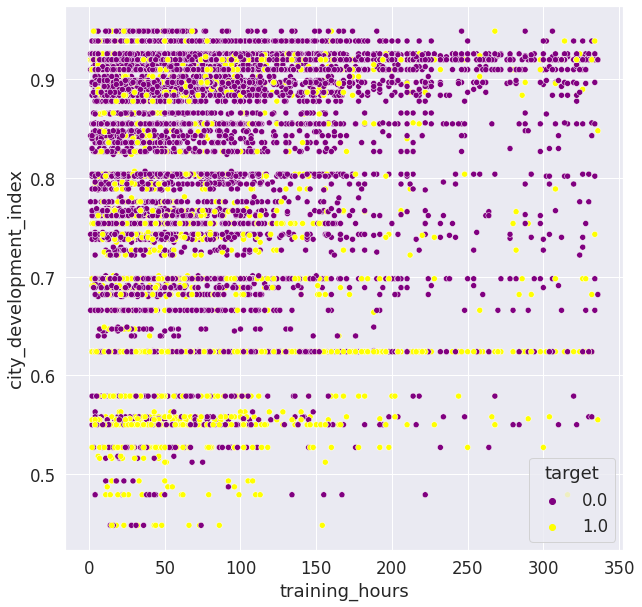

In [ ]:
wes.set_palette('GrandBudapest1')
plt.figure(figsize=(10,10))
grafico1= sns.scatterplot(X_train['training_hours'], X_train['city_development_index'], hue = y_train,  palette=["purple", "yellow"])
plt.show()



Sendo os pontos roxos pessoas que não querem mudar de emprego (target = 0), e os amarelos os que querem (target=1). A partir do gráfico acima, podemos perceber que parece haver uma correlação (ainda que fraca) entre horas de treinamento e índice de desenvolvimento da cidade. Além disso, pessoas com menor treinamento e em cidades menos desenvoldas parecem mais propícias a mudar de emprego.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


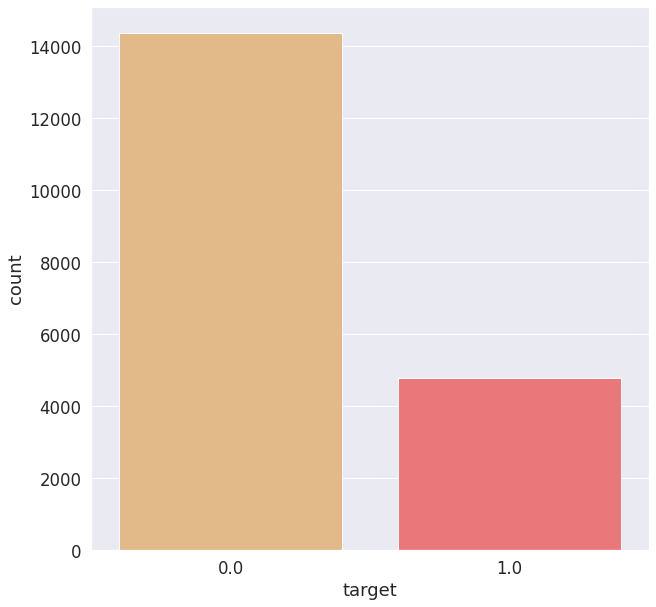

In [ ]:
plt.figure(figsize=(10,10))
sns.countplot(y_train) # data = nome do dataframe 
plt.show()

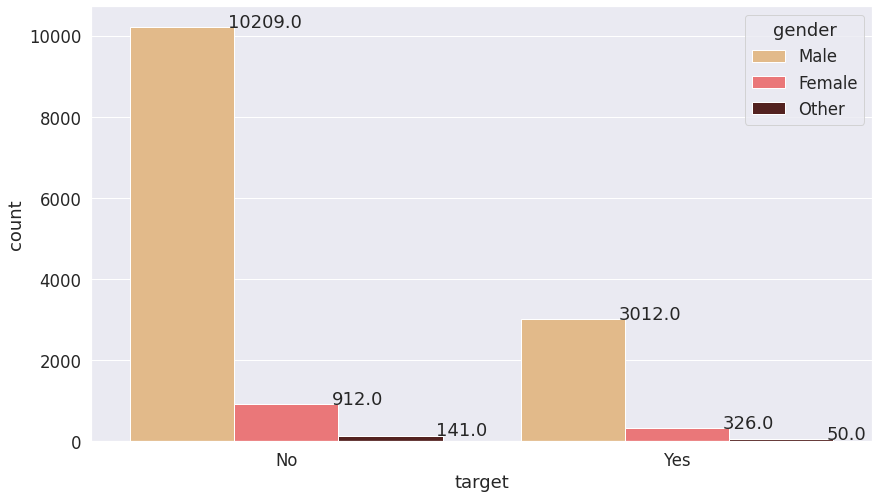

0.0820070137577556
0.9179929862422445
0.09766327142001198
0.902336728579988


In [ ]:
plt.figure(figsize=(14,8))
ax= sns.countplot(x='target', hue='gender', data=df_train)
plt.xticks([0,1], ['No', 'Yes'])
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.show()
mulher_mudar= 912/(10209+912)
homem_mudar= 1- (mulher_mudar)
print (mulher_mudar)
print (homem_mudar)
mulher_nmudar= 326/(3012+326)
homem_nmudar= 1- (mulher_nmudar)
print (mulher_nmudar)
print (homem_nmudar)

Podemos perceber que a grande maioria das pessoas não quer mudar de emprego. Além disso, mulheres são marginalmente mais propensas a quererem ficar no emprego do que homens. 

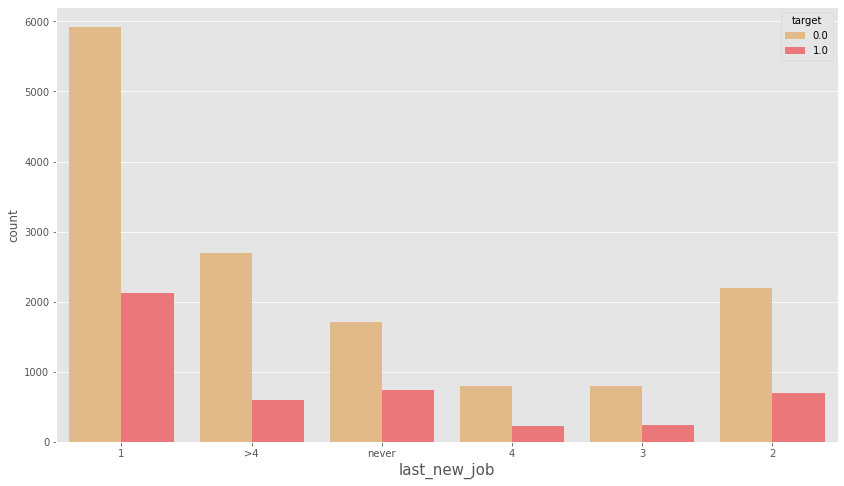

In [ ]:
plt.figure(figsize=(14,8)) #fazer a porcentagem disso
plt.xlabel('last_new_job', fontsize=15)
sns.countplot(x = 'last_new_job',hue='target', data=df_train)

<Figure size 1440x576 with 0 Axes>

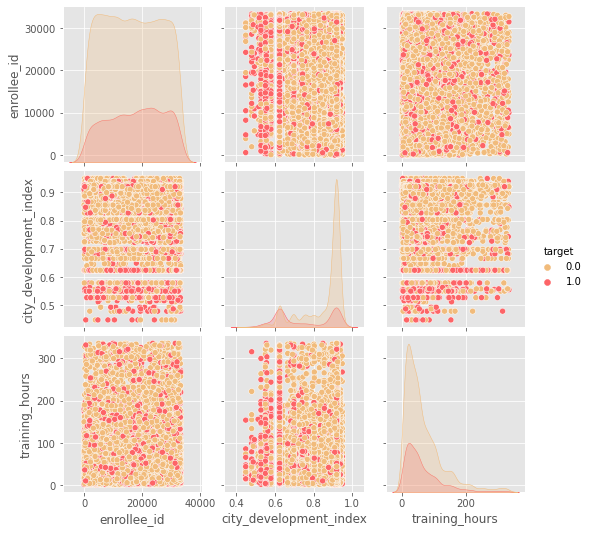

In [ ]:
plt.figure(figsize=(20,8))
sns.pairplot(df_train[df_train.columns], hue = "target")
plt.show()

#Treinando modelo dados de teste
Não precisamos dividir, uma vez que a dataset já está dividida entre os dados a serem usados para treino e aqueles a serem usados para o teste.


##Encoding

Vamos começar transformando variáveis categóricas em numéricas. Para isso, utilizamos one hot encoding, que dará valores binários para as variáveis categóricas.

In [ ]:
one_hot_encoding = pd.get_dummies(X_train)
one_hot_encoding
one_hot_encoding = pd.get_dummies(y_train)
one_hot_encoding
one_hot_encoding = pd.get_dummies(X_test)
one_hot_encoding
one_hot_encoding = pd.get_dummies(y_test)
one_hot_encoding

,enrollee_id,city_development_index,training_hours,city_city_1,city_city_10,city_city_100,city_city_101,city_city_102,city_city_103,city_city_104,city_city_105,city_city_106,city_city_107,city_city_11,city_city_114,city_city_115,city_city_116,city_city_117,city_city_118,city_city_12,city_city_121,city_city_123,city_city_126,city_city_127,city_city_128,city_city_13,city_city_133,city_city_134,city_city_136,city_city_138,city_city_139,city_city_14,city_city_141,city_city_142,city_city_143,city_city_144,city_city_145,city_city_149,city_city_150,city_city_152,...,experience_11,experience_12,experience_13,experience_14,experience_15,experience_16,experience_17,experience_18,experience_19,experience_2,experience_20,experience_3,experience_4,experience_5,experience_6,experience_7,experience_8,experience_9,experience_<1,experience_>20,company_size_10/49,company_size_100-500,company_size_1000-4999,company_size_10000+,company_size_50-99,company_size_500-999,company_size_5000-9999,company_size_<10,company_type_Early Stage Startup,company_type_Funded Startup,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd,last_new_job_1,last_new_job_2,last_new_job_3,last_new_job_4,last_new_job_>4,last_new_job_never
0,32403,0.827,21,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
1,9858,0.920,98,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
2,31806,0.624,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
3,27385,0.827,39,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
4,27724,0.920,72,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2124,1289,0.920,15,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
2125,195,0.897,30,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2126,31762,0.887,18,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
2127,7873,0.804,84,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

## Random Forest
Utilizaremos uma random forest para prever se o indivíduo quer mudar de emprego ou não; usamos o random forest que resolve o problema das árvores, já que adicionando aleatoridade aos dados + combinação de diversas árvores, reduzimos a tendência à overfitting

In [ ]:
X_train = one_hot_encoding.iloc[:,0:-1]
y_train = one_hot_encoding.iloc[:,-1]
X_test = one_hot_encoding.iloc[:,0:-1]
y_test = one_hot_encoding.iloc[:,-1]


rf = RandomForestClassifier(
    max_depth=25,
    n_estimators=200,
    min_samples_split=50,
    criterion='entropy',
    oob_score=True,
    random_state=42
)

rf.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


RandomForestClassifier(criterion='entropy', max_depth=25, min_samples_split=50,
                       n_estimators=200, oob_score=True, random_state=42)

###Avaliação do modelo

In [ ]:
predicted = rf.predict(X_test)
print(f'Out-of-bag score estimate: {rf.oob_score_:.3}')
accuracy = accuracy_score(y_test, predicted)
print(f'Mean accuracy score: {accuracy:.3}')

Out-of-bag score estimate: 0.931
Mean accuracy score: 0.946


[Text(0, 0.5, 'Nao quer mudar'), Text(0, 1.5, 'Quer mudar')]

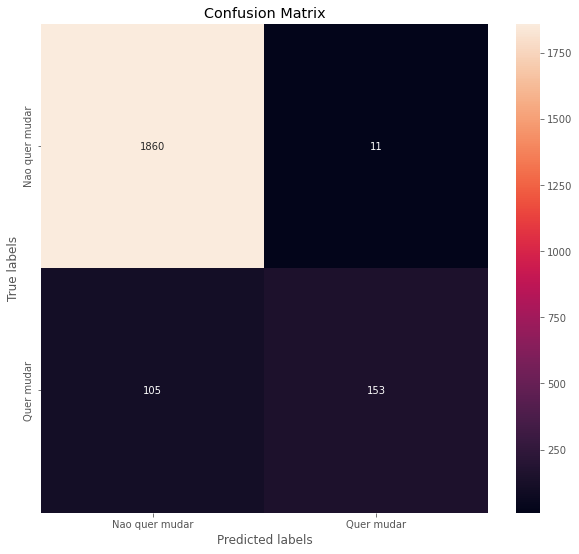

In [ ]:
cm = confusion_matrix(y_test, predicted)
fig, (ax) = plt.subplots(1, 1, figsize=(10,9))
sns.heatmap(cm, annot=True, ax = ax,fmt='g')
# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix')
sns.set(font_scale=1.5)
ax.xaxis.set_ticklabels(['Nao quer mudar', 'Quer mudar'])
ax.yaxis.set_ticklabels(['Nao quer mudar', 'Quer mudar'])

A matriz de confusão nos mostra que, dos dados previstos como "não quer mudar de emprego", 1860 de fato não queriam mudar. Dos previstos como "quer mudar", 153 de fato queriam. Já previstos como "quer mudar" mas não queriam são 11, e o contrário, 105.

A acurácia nos dá (tp+tn)/total; ou seja, quantos exemplos foram corretamente classificados. Dessa forma, temos aqui uma média de acurácia de 94,6%, o que parece indicar que o modelo tem uma taxa elevada.



In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test, predicted).ravel()
print('tn =', tn)
print('fp =', fp)
print('fn =', fn)
print('tp =', tp)


tn = 1860
fp = 11
fn = 105
tp = 153


In [ ]:
#precisao
precisao=tp/(tp+fp)
print (precisao)

0.9329268292682927


In [ ]:
#recall
recall= tp/(tp+fn)
print (recall)
#muitos exemplos positivos não foram classificados como tal

0.5930232558139535


##KNN
Veremos que esse modelo não serve para o estudo de caso, visto que suas métricas são muito ruins



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 100)
knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=100)

### Avaliação do modelo

In [ ]:
predicted_knn = knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, predicted_knn)
print (accuracy_knn)


0.8788163457022076


[Text(0, 0.5, 'Nao quer mudar'), Text(0, 1.5, 'Quer mudar')]

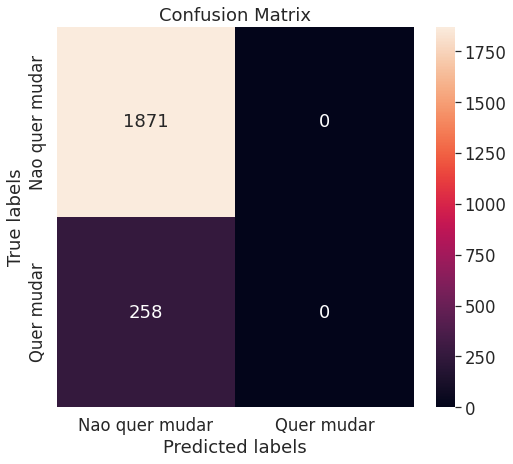

In [ ]:
cm = confusion_matrix(y_test, predicted_knn)
fig, (ax) = plt.subplots(1, 1, figsize=(8,7))
sns.heatmap(cm, annot=True, ax = ax,fmt='g')
# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix')
sns.set(font_scale=1.5)
ax.xaxis.set_ticklabels(['Nao quer mudar', 'Quer mudar'])
ax.yaxis.set_ticklabels(['Nao quer mudar', 'Quer mudar'])

In [ ]:
tn2, fp2, fn2, tp2 = confusion_matrix(y_test, predicted_knn).ravel()
print('tn2=', tn2)
print('fp2 =', fp2)
print('fn2 =', fn2)
print('tp2 =', tp2)


tn2= 1871
fp2 = 0
fn2 = 258
tp2 = 0


In [ ]:
#precisao
precisao_knn = tp2 /(tp2 + fp2)
print (precisao_knn) #porcaria em termos de precisao 

nan


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in long_scalars
  


In [ ]:
#recall
recall2= tp2/(tp2+fn2)
print (recall2)


0.0


##SVM
Vamos usar, agora, o Support vector machine. Veremos que, apesar de uma boa precisão, o modelo ainda perde para o Random Forest em termos de recall.

In [ ]:
from sklearn import svm

In [ ]:
model_svm = svm.SVC(C = 1E9)
model_svm.fit(X_train, y_train)
y_predict_svm = model_svm.predict(X_test)
print(y_predict)

[0 0 0 ... 0 0 0]


[Text(0, 0.5, 'Nao quer mudar'), Text(0, 1.5, 'Quer mudar')]

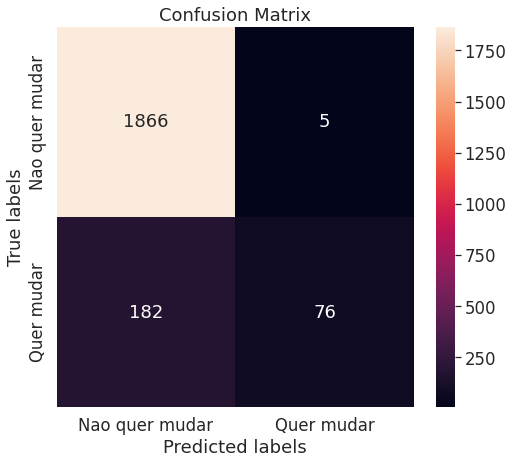

In [ ]:
cm = confusion_matrix(y_test, y_predict_svm)
fig, (ax) = plt.subplots(1, 1, figsize=(8,7))
sns.heatmap(cm, annot=True, ax = ax,fmt='g')
# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix')
sns.set(font_scale=1.5)
ax.xaxis.set_ticklabels(['Nao quer mudar', 'Quer mudar'])
ax.yaxis.set_ticklabels(['Nao quer mudar', 'Quer mudar'])

In [ ]:
tn3, fp3, fn3, tp3 = confusion_matrix(y_test, y_predict_svm).ravel()
print('tn3=', tn3)
print('fp3 =', fp3)
print('fn3 =', fn3)
print('tp3 =', tp3)

tn3= 1866
fp3 = 5
fn3 = 182
tp3 = 76


In [ ]:
#precisao
precisao_svm = tp3 /(tp3 + fp3)
print (precisao_svm) 

0.9382716049382716


O modelo apresenta uma boa precisão, ou seja, avalia bem true negatives (pessoas que modelo prevê que não quer mudar e realmente não querem) e tem poucos false positives (ou seja, modelo prever que quer mudar quando na realidade não quer).


In [ ]:
#recall
recall3= tp3/(tp3+fn3)
print (recall3)

0.29457364341085274


O modelo tem um recall baixo, uma vez que, apesar de prever bem quem realmente quer mudar, apresenta muitos false negatives, ou seja, previsões de pessoas que não querem mudar, quando elas na realidade querem.